This code calculates the frequency of words related to either fast love or slow love 

For triangulation, we get several measures of fast and of slow love. The main measures are impulsive_feelings and slow_feelings; 

The secondary measures are pleasure, asceticism, short_term (relationships), long_term (relationships), physical, moral, other_body, other_mental

In [1]:
import pandas as pd
import collections
from nltk import ConcordanceIndex
import ast
import os

In [ ]:
## open pre-processed and filtered list of words (only nouns and adjectives)

base_dir1 = os.getcwd()
file = base_dir1 + '/1.2_output_filtered.csv'

print(file)
df= pd.read_csv(file)
df

In [ ]:
## word lists

## Lists of words potentially related to slow and fast love, organized by categories

impulsive_feelings = ['passion', 'desire', 'fire', 'fool', 'flame', 'mad', 'jealous', 
 'blind', 'folly', 'foolish', 'haste', 'jealousy', 'wild', 'heat', 
 'jealousie', 'hot', 'rash', 'pang', 'passionate', 'eager', 'burn', 
 'impatient', 'ardent', 'doat', 'transport', 'possession', 'temper']

slow_feelings = ['dear', 'kind', 'affection', 'care', 'fond', 'tender', 'gentle', 
 'kindness', 'respect', 'safe', 'tenderness', 'mutual', 'safety', 'esteem',
'patience', 'fondness', 'compassion', 'confidence', 'calm', 'assurance', 
 'sincere', 'friendly', 'aid', 'admiration', 'careful', 'grateful', 'regard',
'secure', 'sympathy', 'harmony', 'trust', 'devotion','friend','friendship']

pleasure = ['sweet', 'pleasure', 'breast', 'tongue', 'delight', 'bed', 'sex',
'kiss', 'bosom', 'breath', 'please', 'bliss', 'lust', 'venus', 
'nymph', 'rapture', 'flesh', 'pleasant', 'sweetness', 'satisfaction', 'ass', 'satisfy', 'leisure']

asceticism = ['duty', 'pure', 'virgin', 'chaste', 'innocence', 'innocent', 
              'sacrifice', 'delay', 'chastity']

short_term = ['mistress', 'wench', 'wanton', 'affair', 'quick', 'conquest', 
              'wretch', 'whore', 'fast', 'adventure', 'lover']

long_term = ['true', 'faithful', 'oath', 'promise', 
             'constancy', 'constant', 'eternal', 'troth', 'faith',  
             'bond', 'everlasting', 'loyalty', 'future', 
             'loyal', 'couple', 'endless', 'union', 'real',
             'wife', 'husband', 'vow', 'marriage', 'bride', 'altar', 
             'hymen',  'nuptial', 'ceremony', 'church','marry','family']

physical=['fair', 'beauty', 'young', 'youth', 'charm', 'look', 'sight', 'pretty', 'charming', 
          'handsome', 'beauteous', 'swain', 'beautiful',  'beautifull']

moral= ['honour', 'virtue', 'noble', 'honest', 'sense', 'generous', 'virtuous', 'merit',
        'honourable', 'vertue',  'gracious', 'value', 'honor', 'judgement',
        'wisdom', 'honesty', 'character', 'nobl', 'resolve', 'brave', 'judgment', 'truth',  
        'frank','earnest', 'humble', 'modest','modesty']

other_body = ['eye', 'hand', 'face', 'body', 'head', 'ear', 'smile', 'foot', 'lip', 'knee', 
              'cheek', 'pale', 'hair', 'nose', 'tooth', 'finger', 'neck', 'mouth']

other_mental =['heart', 'soul', 'mind', 'reason', 'thought', 'spirit', 'knowledge', 'brain', 'conscience']

fast_all = impulsive_feelings + physical + pleasure + short_term + other_body
slow_all = slow_feelings + asceticism + moral + long_term + other_mental

list_of_categories = [impulsive_feelings,
slow_feelings,
pleasure,
asceticism,
short_term,
long_term,
physical,
moral,
other_body,
other_mental,
fast_all,
slow_all]

In [ ]:
## function to calculate word frequencies

def compute_frequencies (list_string, list_of_categories):
    global apply_counter1
    #print(list_string)
    tokenized_text = ast.literal_eval(list_string)
    #print(list1)
    

    
    word_counter = collections.Counter(tokenized_text)
    #print(word_counter)


    ## Get total number of words in list     
    total_words = len(tokenized_text)
    #print(total_words)
  
    
    ## Get frequencies of words per categry
    list_of_category_frequencies = []
    for category in list_of_categories:
        #print(category)
        category_count = 0.0
        
        for word in category:
            #print(word)
            category_count += int(word_counter[word])
        
        if total_words !=0 and category_count>0:
            category_frequency = category_count/total_words
            #print(category_frequency)
        else: category_frequency = float("nan")
        list_of_category_frequencies += [category_frequency]
        
    apply_counter1 +=1
    print(apply_counter1)
    
    return(list_of_category_frequencies)

In [ ]:
## execute function to database

apply_counter1 = 0

df2 = df.copy()
df2['frequencies'] = df2['text'].apply(compute_frequencies, list_of_categories=list_of_categories)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
df2

,Unnamed: 0,file,author,year,title,text,frequencies
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,"['hall', 'lord', 'abberville', 'house', 'stair...","[0.006197981228971135, 0.011510536568089251, 0..."
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,"['thing', 'life', 'miserable', 'thread', 'bare...","[0.025324966382787986, 0.00874047512326311, 0...."
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,"['countess', 'helen', 'lord', 'lafew', 'black'...","[0.008545547769612033, 0.014356520252948214, 0..."
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,"['dear', 'melissa', 'happy', 'woman', 'doubt',...","[0.01304631441617743, 0.0228310502283105, 0.00..."
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,"['run', 'run', 'run', 'chimney', 'help', 'help...","[0.0200909780136467, 0.02293404094010614, 0.01..."
...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,"['sun', 'plain', 'field', 'wherefore', 'galath...","[0.017417749516173624, 0.017141277301631185, 0..."
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,"['postilion', 'drug', 'ass', 'inn', 'sir', 'sm...","[0.0067061143984220905, 0.015779092702169626, ..."
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,"['freeman', 'lovel', 'country', 'boy', 'scheme...","[0.00495272399819901, 0.0135074290859973, 0.00..."
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,"['good', 'morrow', 'good', 'lord', 'king', 'si...","[0.010582010582010581, 0.02782676856750931, 0...."


In [ ]:
df3 = df2.copy()

del df3['text']

df3

,Unnamed: 0,file,author,year,title,frequencies
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,"[0.006197981228971135, 0.011510536568089251, 0..."
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,"[0.025324966382787986, 0.00874047512326311, 0...."
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,"[0.008545547769612033, 0.014356520252948214, 0..."
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,"[0.01304631441617743, 0.0228310502283105, 0.00..."
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,"[0.0200909780136467, 0.02293404094010614, 0.01..."
...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,"[0.017417749516173624, 0.017141277301631185, 0..."
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,"[0.0067061143984220905, 0.015779092702169626, ..."
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,"[0.00495272399819901, 0.0135074290859973, 0.00..."
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,"[0.010582010582010581, 0.02782676856750931, 0...."


In [ ]:
## Here we distribute the list of frequencies of different categories to different columns

df4 = df3.copy()

## first we create a list for each category ...

impulsive_feelings2 = []
slow_feelings2 = []
pleasure2 = []
asceticism2 = []
short_term2 = []
long_term2 = []
physical2 = []
moral2 = []
other_body2 = []
other_mental2 = []
fast_all2 = []
slow_all2 = []

list_of_categories2 = [impulsive_feelings2, slow_feelings2, pleasure2, asceticism2, short_term2,
                      long_term2, physical2, moral2, other_body2, other_mental2, fast_all2, slow_all2]





for index, row in df4.iterrows():
    #print(index)
    list_of_frequencies = row['frequencies']
    
    for category, frequency in zip(list_of_categories2, list_of_frequencies):
        category +=[frequency]


     

In [ ]:
#... and then we write each list to a column

list_of_category_names = ['impulsive_feelings', 'slow_feelings', 'pleasure', 'asceticism', 'short_term',
                      'long_term', 'physical', 'moral', 'other_body', 'other_mental', 'fast_all', 'slow_all']   

for catName,catFreqs in zip(list_of_category_names,list_of_categories2):
    df4[catName] = catFreqs

In [ ]:
df4

,Unnamed: 0,file,author,year,title,frequencies,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,long_term,physical,moral,other_body,other_mental,fast_all,slow_all
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,"[0.006197981228971135, 0.011510536568089251, 0...",0.006198,0.011511,0.003896,0.003896,0.002479,0.017354,0.007083,0.017709,0.010271,0.013104,0.029927,0.063574
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,"[0.025324966382787986, 0.00874047512326311, 0....",0.025325,0.008740,0.010533,0.000896,0.005827,0.020170,0.016360,0.007620,0.025325,0.014567,0.083371,0.051995
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,"[0.008545547769612033, 0.014356520252948214, 0...",0.008546,0.014357,0.011451,0.003247,0.003076,0.020509,0.012135,0.027858,0.018117,0.010255,0.053324,0.076226
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,"[0.01304631441617743, 0.0228310502283105, 0.00...",0.013046,0.022831,0.004349,0.001305,0.005436,0.014786,0.014351,0.010872,0.013916,0.011307,0.051098,0.061100
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,"[0.0200909780136467, 0.02293404094010614, 0.01...",0.020091,0.022934,0.010614,0.004549,0.003222,0.014973,0.010993,0.015163,0.014973,0.025588,0.059894,0.083207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,"[0.017417749516173624, 0.017141277301631185, 0...",0.017418,0.017141,0.034283,0.019353,0.007465,0.008847,0.029583,0.016035,0.025435,0.020735,0.114183,0.082112
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,"[0.0067061143984220905, 0.015779092702169626, ...",0.006706,0.015779,0.012229,0.000789,0.007495,0.008284,0.007495,0.016568,0.006312,0.007890,0.040237,0.049310
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,"[0.00495272399819901, 0.0135074290859973, 0.00...",0.004953,0.013507,0.005403,0.000000,0.004953,0.004052,0.004953,0.040973,0.011706,0.003602,0.031968,0.062134
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,"[0.010582010582010581, 0.02782676856750931, 0....",0.010582,0.027827,0.013325,0.002939,0.004703,0.014501,0.009602,0.014109,0.019792,0.012542,0.058005,0.071918


In [ ]:
df5 = df4.copy()

del df5['frequencies']

df5

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,long_term,physical,moral,other_body,other_mental,fast_all,slow_all
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,0.017354,0.007083,0.017709,0.010271,0.013104,0.029927,0.063574
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,0.020170,0.016360,0.007620,0.025325,0.014567,0.083371,0.051995
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,0.020509,0.012135,0.027858,0.018117,0.010255,0.053324,0.076226
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,0.014786,0.014351,0.010872,0.013916,0.011307,0.051098,0.061100
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,0.014973,0.010993,0.015163,0.014973,0.025588,0.059894,0.083207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,0.008847,0.029583,0.016035,0.025435,0.020735,0.114183,0.082112
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,0.008284,0.007495,0.016568,0.006312,0.007890,0.040237,0.049310
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,0.004052,0.004953,0.040973,0.011706,0.003602,0.031968,0.062134
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,0.014501,0.009602,0.014109,0.019792,0.012542,0.058005,0.071918


In [ ]:
## Finally we calculate ratios of interest

## Calculate ratios

df5['ratio_feelings']= (df5['slow_feelings'] - df5['impulsive_feelings'])/(df5['slow_feelings'] + df5['impulsive_feelings'])
df5['ratio_traits']= (df5['moral'] - df5['physical'])/(df5['moral'] + df5['physical'])
df5['ratio_behavior']= (df5['asceticism'] - df5['pleasure'])/(df5['asceticism'] + df5['pleasure'])
df5['ratio_global']= (df5['slow_all'] - df5['fast_all'])/(df5['slow_all'] + df5['fast_all'])

In [ ]:
df5

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,physical,moral,other_body,other_mental,fast_all,slow_all,ratio_feelings,ratio_traits,ratio_behavior,ratio_global
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,0.007083,0.017709,0.010271,0.013104,0.029927,0.063574,0.300000,0.428571,0.000000,0.359848
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,0.016360,0.007620,0.025325,0.014567,0.083371,0.051995,-0.486842,-0.364486,-0.843137,-0.231788
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,0.012135,0.027858,0.018117,0.010255,0.053324,0.076226,0.253731,0.393162,-0.558140,0.176781
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,0.014351,0.010872,0.013916,0.011307,0.051098,0.061100,0.272727,-0.137931,-0.538462,0.089147
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,0.010993,0.015163,0.014973,0.025588,0.059894,0.083207,0.066079,0.159420,-0.400000,0.162914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,0.029583,0.016035,0.025435,0.020735,0.114183,0.082112,-0.008000,-0.296970,-0.278351,-0.163380
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,0.007495,0.016568,0.006312,0.007890,0.040237,0.049310,0.403509,0.377049,-0.878788,0.101322
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,0.004953,0.040973,0.011706,0.003602,0.031968,0.062134,0.463415,0.784314,-1.000000,0.320574
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,0.009602,0.014109,0.019792,0.012542,0.058005,0.071918,0.448980,0.190083,-0.638554,0.107089


In [ ]:
df5.to_csv('Love_frequencies.csv') 

## Now we transform all to z-scores and eliminate outliers

In [ ]:
## First we select the period of time we are most interested in
## In the case of this paper until 1900

df6 = df5.copy()

## Transform columns to floats (numeric)
df6['year']= pd.to_numeric(df6['year'], errors='coerce', downcast='integer')


## Select the period of time you are interested in
df7 = df6[df6['year']<1901]

list_of_category_names = ['impulsive_feelings', 'slow_feelings', 'pleasure', 'asceticism', 'short_term',
                      'long_term', 'physical', 'moral', 'other_body', 'other_mental', 'fast_all', 'slow_all',
                          'ratio_feelings','ratio_traits', 'ratio_behavior','ratio_global'] 


## transform all to numeric

for catName in list_of_category_names:
    df7[catName]= df7[catName].astype('float')

df7


,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,physical,moral,other_body,other_mental,fast_all,slow_all,ratio_feelings,ratio_traits,ratio_behavior,ratio_global
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,0.007083,0.017709,0.010271,0.013104,0.029927,0.063574,0.300000,0.428571,0.000000,0.359848
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,0.016360,0.007620,0.025325,0.014567,0.083371,0.051995,-0.486842,-0.364486,-0.843137,-0.231788
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,0.012135,0.027858,0.018117,0.010255,0.053324,0.076226,0.253731,0.393162,-0.558140,0.176781
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,0.014351,0.010872,0.013916,0.011307,0.051098,0.061100,0.272727,-0.137931,-0.538462,0.089147
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,0.010993,0.015163,0.014973,0.025588,0.059894,0.083207,0.066079,0.159420,-0.400000,0.162914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,0.029583,0.016035,0.025435,0.020735,0.114183,0.082112,-0.008000,-0.296970,-0.278351,-0.163380
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,0.007495,0.016568,0.006312,0.007890,0.040237,0.049310,0.403509,0.377049,-0.878788,0.101322
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,0.004953,0.040973,0.011706,0.003602,0.031968,0.062134,0.463415,0.784314,-1.000000,0.320574
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,0.009602,0.014109,0.019792,0.012542,0.058005,0.071918,0.448980,0.190083,-0.638554,0.107089


In [ ]:
from scipy import stats


## Compute z-scores ignore missing values 'nan'

df8 = df7.copy()

for catName in list_of_category_names:
    catName_z = 'z_' + catName
    df8[catName_z] = stats.zscore(df8[catName], nan_policy='omit')

df8

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,z_physical,z_moral,z_other_body,z_other_mental,z_fast_all,z_slow_all,z_ratio_feelings,z_ratio_traits,z_ratio_behavior,z_ratio_global
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,-0.897582,0.194076,-1.194647,-0.461279,-1.816827,-0.462769,0.213681,1.068740,2.442308,1.695896
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,0.710528,-1.352222,1.226441,-0.231623,1.589366,-1.189396,-3.275243,-1.880672,-1.234420,-2.149780
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,-0.021973,1.749778,0.067138,-0.908558,-0.325637,0.331239,0.008522,0.937053,0.008390,0.505946
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,0.362205,-0.853779,-0.608413,-0.743414,-0.467521,-0.617981,0.092752,-1.038105,0.094201,-0.063679
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,-0.219846,-0.196079,-0.438356,1.498088,0.093077,0.769306,-0.823543,0.067757,0.698000,0.415809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,3.002513,-0.062367,1.244209,0.736497,3.553181,0.700607,-1.152017,-1.629576,1.228485,-1.705125
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,-0.826223,0.019274,-1.831408,-1.279785,-1.159767,-1.357888,0.672648,0.877127,-1.389884,0.015454
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,-1.266924,3.759789,-0.963780,-1.952759,-1.686796,-0.553098,0.938276,2.391760,-1.918462,1.440611
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,-0.460964,-0.357575,0.336638,-0.549594,-0.027303,0.060907,0.874270,0.181791,-0.342280,0.052943


In [ ]:
## eliminate extreme outliers, Z-score higher than 2 or lower than -2

import numpy as np
df9 = df8.copy()

for catName in list_of_category_names:
    catName_z = 'z_' + catName
    catName_noOutliers = catName + '_Out'
    
    df9[catName_noOutliers] = df9[catName_z].mask(df9[catName_z] > 2, np.nan)
    df9[catName_noOutliers] = df9[catName_noOutliers].mask(df9[catName_noOutliers] < -2, np.nan)

df9

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,physical_Out,moral_Out,other_body_Out,other_mental_Out,fast_all_Out,slow_all_Out,ratio_feelings_Out,ratio_traits_Out,ratio_behavior_Out,ratio_global_Out
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,-0.897582,0.194076,-1.194647,-0.461279,-1.816827,-0.462769,0.213681,1.068740,NaN,1.695896
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,0.710528,-1.352222,1.226441,-0.231623,1.589366,-1.189396,NaN,-1.880672,-1.234420,NaN
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,-0.021973,1.749778,0.067138,-0.908558,-0.325637,0.331239,0.008522,0.937053,0.008390,0.505946
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,0.362205,-0.853779,-0.608413,-0.743414,-0.467521,-0.617981,0.092752,-1.038105,0.094201,-0.063679
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,-0.219846,-0.196079,-0.438356,1.498088,0.093077,0.769306,-0.823543,0.067757,0.698000,0.415809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,NaN,-0.062367,1.244209,0.736497,NaN,0.700607,-1.152017,-1.629576,1.228485,-1.705125
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,-0.826223,0.019274,-1.831408,-1.279785,-1.159767,-1.357888,0.672648,0.877127,-1.389884,0.015454
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,-1.266924,NaN,-0.963780,-1.952759,-1.686796,-0.553098,0.938276,NaN,-1.918462,1.440611
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,-0.460964,-0.357575,0.336638,-0.549594,-0.027303,0.060907,0.874270,0.181791,-0.342280,0.052943


In [ ]:
## here is another way to calculate normalized ratos, based on z-scores

df9['ratio_feelings2']= (df9['slow_feelings_Out'] - df9['impulsive_feelings_Out'])
df9['ratio_traits2']= (df9['moral_Out'] - df9['physical_Out'])
df9['ratio_behavior2']= (df9['asceticism_Out'] - df9['pleasure_Out'])
df9['ratio_global2']= (df9['slow_all_Out'] - df9['fast_all_Out'])
df9

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,fast_all_Out,slow_all_Out,ratio_feelings_Out,ratio_traits_Out,ratio_behavior_Out,ratio_global_Out,ratio_feelings2,ratio_traits2,ratio_behavior2,ratio_global2
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,-1.816827,-0.462769,0.213681,1.068740,NaN,1.695896,0.124267,1.091658,1.670347,1.354058
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,1.589366,-1.189396,NaN,-1.880672,-1.234420,NaN,NaN,-2.062751,-0.839139,-2.778762
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,-0.325637,0.331239,0.008522,0.937053,0.008390,0.505946,-0.041240,1.771751,-0.005041,0.656877
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,-0.467521,-0.617981,0.092752,-1.038105,0.094201,-0.063679,0.048868,-1.215984,0.479909,-0.150461
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,0.093077,0.769306,-0.823543,0.067757,0.698000,0.415809,NaN,0.023766,0.705725,0.676229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,NaN,0.700607,-1.152017,-1.629576,1.228485,-1.705125,-1.742750,NaN,NaN,NaN
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,-1.159767,-1.357888,0.672648,0.877127,-1.389884,0.015454,0.581492,0.845497,-1.198858,-0.198120
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,-1.686796,-0.553098,0.938276,NaN,-1.918462,1.440611,0.685399,NaN,-0.272369,1.133699
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,-0.027303,0.060907,0.874270,0.181791,-0.342280,0.052943,1.300245,0.103390,-0.483466,0.088210


In [ ]:
## eliminate outliers at the ratio level

list_of_category_names2 = ['ratio_feelings2', 'ratio_traits2', 'ratio_behavior2', 'ratio_global2']

for catName in list_of_category_names2:
    catName_z = catName
    catName_noOutliers = catName + '_Out'
    
    df9[catName_noOutliers] = df9[catName_z].mask(df9[catName_z] > 2, np.nan)
    df9[catName_noOutliers] = df9[catName_noOutliers].mask(df9[catName_noOutliers] < -2, np.nan)

df9

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,ratio_behavior_Out,ratio_global_Out,ratio_feelings2,ratio_traits2,ratio_behavior2,ratio_global2,ratio_feelings2_Out,ratio_traits2_Out,ratio_behavior2_Out,ratio_global2_Out
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,NaN,1.695896,0.124267,1.091658,1.670347,1.354058,0.124267,1.091658,1.670347,1.354058
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,-1.234420,NaN,NaN,-2.062751,-0.839139,-2.778762,NaN,NaN,-0.839139,NaN
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,0.008390,0.505946,-0.041240,1.771751,-0.005041,0.656877,-0.041240,1.771751,-0.005041,0.656877
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,0.094201,-0.063679,0.048868,-1.215984,0.479909,-0.150461,0.048868,-1.215984,0.479909,-0.150461
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,0.698000,0.415809,NaN,0.023766,0.705725,0.676229,NaN,0.023766,0.705725,0.676229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,1.228485,-1.705125,-1.742750,NaN,NaN,NaN,-1.742750,NaN,NaN,NaN
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,-1.389884,0.015454,0.581492,0.845497,-1.198858,-0.198120,0.581492,0.845497,-1.198858,-0.198120
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,-1.918462,1.440611,0.685399,NaN,-0.272369,1.133699,0.685399,NaN,-0.272369,1.133699
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,-0.342280,0.052943,1.300245,0.103390,-0.483466,0.088210,1.300245,0.103390,-0.483466,0.088210


In [ ]:
## save dataFrame as CSV

df9.to_csv('2.1_output_Frequencies_zscore.csv')


## Plot some time series

In [ ]:
import seaborn as sns

df10 = df9.copy()

#df10 =df9 # df9.dropna()

df10

,Unnamed: 0,file,author,year,title,impulsive_feelings,slow_feelings,pleasure,asceticism,short_term,...,ratio_behavior_Out,ratio_global_Out,ratio_feelings2,ratio_traits2,ratio_behavior2,ratio_global2,ratio_feelings2_Out,ratio_traits2_Out,ratio_behavior2_Out,ratio_global2_Out
0,0,CumberlandRichard-1772-The fashionable love68.txt,CumberlandRichard,1772,The fashionable love68.txt,0.006198,0.011511,0.003896,0.003896,0.002479,...,NaN,1.695896,0.124267,1.091658,1.670347,1.354058,0.124267,1.091658,1.670347,1.354058
1,1,Lyly John-1591-Mother Bombi.txt,Lyly John,1591,Mother Bombi.txt,0.025325,0.008740,0.010533,0.000896,0.005827,...,-1.234420,NaN,NaN,-2.062751,-0.839139,-2.778762,NaN,NaN,-0.839139,NaN
2,2,WilliamShakespeare-1602-All's Well That Ends.txt,WilliamShakespeare,1602,All's Well That Ends.txt,0.008546,0.014357,0.011451,0.003247,0.003076,...,0.008390,0.505946,-0.041240,1.771751,-0.005041,0.656877,-0.041240,1.771751,-0.005041,0.656877
3,3,HolcroftThomas-1781-Duplicity a comedy159.txt,HolcroftThomas,1781,Duplicity a comedy159.txt,0.013046,0.022831,0.004349,0.001305,0.005436,...,0.094201,-0.063679,0.048868,-1.215984,0.479909,-0.150461,0.048868,-1.215984,0.479909,-0.150461
4,4,CoryeJohn-1672-The generous enemies49.txt,CoryeJohn,1672,The generous enemies49.txt,0.020091,0.022934,0.010614,0.004549,0.003222,...,0.698000,0.415809,NaN,0.023766,0.705725,0.676229,NaN,0.023766,0.705725,0.676229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,Lyly John-1584-Gallathea.txt,Lyly John,1584,Gallathea.txt,0.017418,0.017141,0.034283,0.019353,0.007465,...,1.228485,-1.705125,-1.742750,NaN,NaN,NaN,-1.742750,NaN,NaN,NaN
928,928,anon-1601-The Contention between Liberality an...,anon,1601,The Contention between Liberality and Prodigal...,0.006706,0.015779,0.012229,0.000789,0.007495,...,-1.389884,0.015454,0.581492,0.845497,-1.198858,-0.198120,0.581492,0.845497,-1.198858,-0.198120
929,929,TownleyJames-1780-High life below stai38.txt,TownleyJames,1780,High life below stai38.txt,0.004953,0.013507,0.005403,0.000000,0.004953,...,-1.918462,1.440611,0.685399,NaN,-0.272369,1.133699,0.685399,NaN,-0.272369,1.133699
930,930,Brome Richard-1635-The Lovesick Court or The A...,Brome Richard,1635,The Lovesick Court or The Ambitious Politi.txt,0.010582,0.027827,0.013325,0.002939,0.004703,...,-0.342280,0.052943,1.300245,0.103390,-0.483466,0.088210,1.300245,0.103390,-0.483466,0.088210


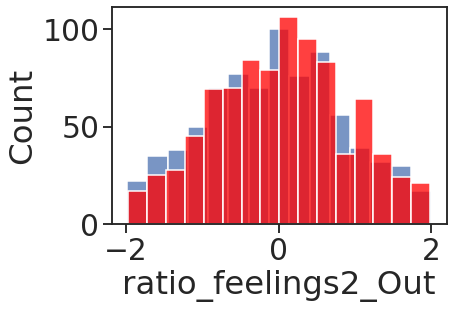

In [ ]:
sns.histplot(df10['ratio_feelings2_Out'])
sns.histplot(df10['ratio_feelings_Out'], color='red')

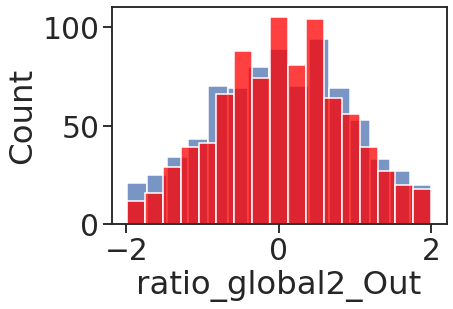

In [ ]:
sns.histplot(df10['ratio_global2_Out'])
sns.histplot(df10['ratio_global_Out'], color='red')

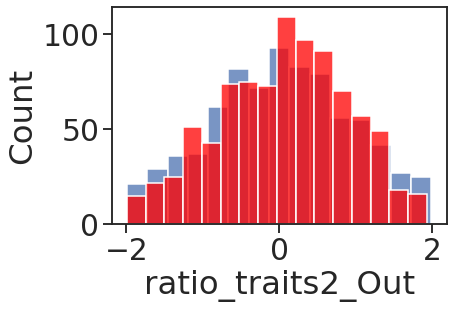

In [ ]:
sns.histplot(df10['ratio_traits2_Out'])
sns.histplot(df10['ratio_traits_Out'], color='red')

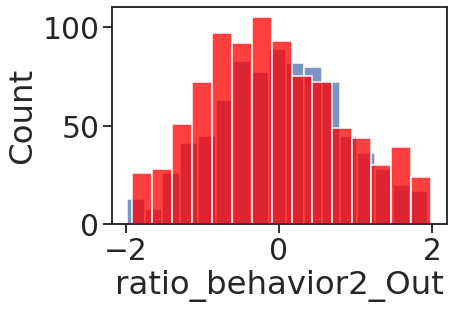

In [ ]:
sns.histplot(df10['ratio_behavior2_Out'])
sns.histplot(df10['ratio_behavior_Out'], color='red')

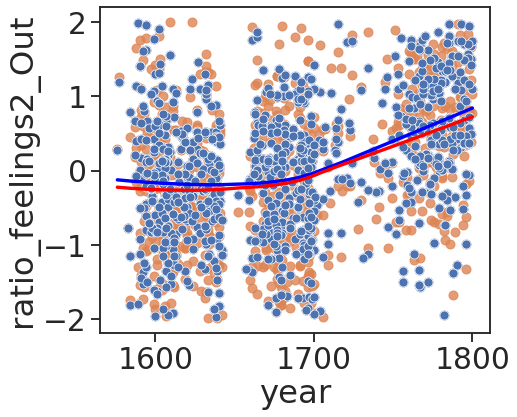

In [ ]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df10, lowess=True, line_kws={"color": "blue"}, x="year", y="ratio_feelings_Out")
sns.regplot(data=df10, lowess=True, line_kws={"color": "red"}, x="year", y="ratio_feelings2_Out")
sns.scatterplot(data=df10, x="year", y="ratio_feelings_Out", ci=None)



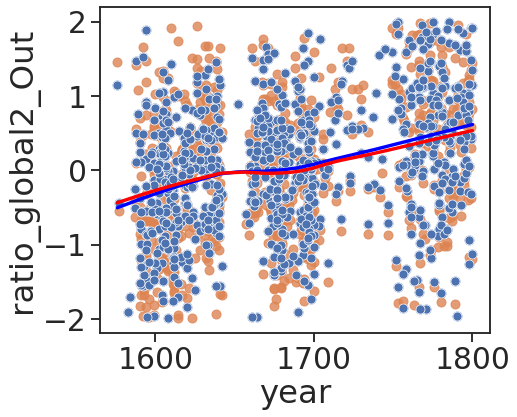

In [ ]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df10, lowess=True, line_kws={"color": "blue"}, x="year", y="ratio_global_Out")
sns.regplot(data=df10, lowess=True, line_kws={"color": "red"}, x="year", y="ratio_global2_Out")

sns.scatterplot(data=df10, x="year", y="ratio_global_Out", ci=None)


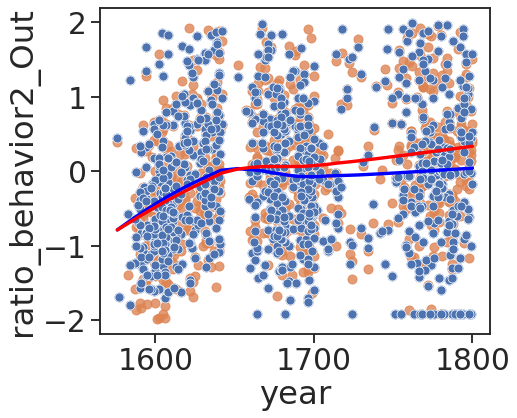

In [ ]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df10, lowess=True, line_kws={"color": "blue"}, x="year", y="ratio_behavior_Out")
sns.regplot(data=df10, lowess=True, line_kws={"color": "red"}, x="year", y="ratio_behavior2_Out")

sns.scatterplot(data=df10, x="year", y="ratio_behavior_Out", ci=None)



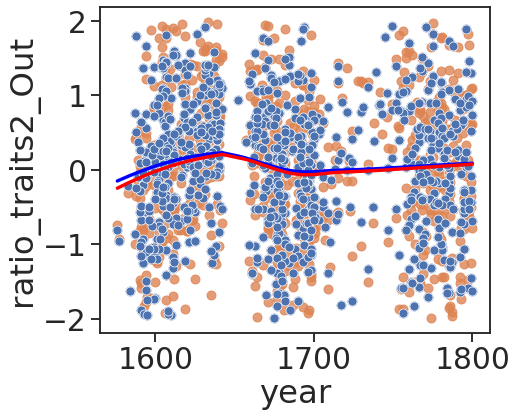

In [ ]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df10, lowess=True, line_kws={"color": "blue"}, x="year", y="ratio_traits_Out")
sns.regplot(data=df10, lowess=True, line_kws={"color": "red"}, x="year", y="ratio_traits2_Out")

sns.scatterplot(data=df10, x="year", y="ratio_traits_Out", ci=None)

